In [47]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [42]:
#MDD
sets = ["Tc", "Sc", "TSc", "Tc_tc", "Sc_sc", "TSc_tsc", "Tct_s", "Scs_s", "Tct_Scs_s", "Tct_tc_s", "Scs_sc_s", "Tct_Scs_tc_sc_s"]
n_cv_folds = 4
n_k = 8

input_filedir = '/Users/lee_jollans/Projects/clustering_pilot/FEB_PUT/FEB_'
modstr = '_mod_ctrl_'
input_filedirn = '/Users/lee_jollans/Projects/clustering_pilot/null/MDDnull/MDD__'
modstrn = '_mod_null_'

input_filediri = '/Users/lee_jollans/Projects/clustering_pilot/IXI2/act/IXI2_'
modstri = '_mod_'
input_filedirin = '/Users/lee_jollans/Projects/clustering_pilot/IXI2/null2/IXI2_'
modstrin = '_mod_null_'

In [91]:
##################
#    LEVEL 1     #
##################

with open(input_filedir + modstr + 'sil_pac_lvl1.pkl', 'rb') as f:
    [silhouette_lvl1,pac_lvl1,clussize_lvl1]=pickle.load(f)

with open(input_filedirn + modstrn + 'sil_pac_lvl1.pkl', 'rb') as f:
    [silhouette_lvl1n,pac_lvl1n,clussize_lvl1n]=pickle.load(f)
    
with open(input_filediri + modstri + 'sil_pac_lvl1.pkl', 'rb') as f:
    [silhouette_lvl1i,pac_lvl1i,clussize_lvl1i]=pickle.load(f)

with open(input_filedirin + modstrin + 'sil_pac_lvl1.pkl', 'rb') as f:
    [silhouette_lvl1in,pac_lvl1in,clussize_lvl1in]=pickle.load(f)
    
##################
#    LEVEL 2     #
##################

with open(input_filedir + modstr + 'sil_f1_prob_lvl2.pkl', 'rb') as f:
    [silhouette1_lvl2,silhouette2_lvl2,microf1_lvl2,macrof1_lvl2,testproba_lvl2,clussize_CE_lvl2,clussize_test_lvl2]=pickle.load(f)

with open(input_filedirn + modstrn + 'sil_f1_prob_lvl2.pkl', 'rb') as f:
    [silhouette1_lvl2n,silhouette2_lvl2n,microf1_lvl2n,macrof1_lvl2n,testproba_lvl2n,clussize_CE_lvl2n,clussize_test_lvl2n]=pickle.load(f)

with open(input_filediri + modstri + 'sil_f1_prob_lvl2.pkl', 'rb') as f:
    [silhouette1_lvl2i,silhouette2_lvl2i,microf1_lvl2i,macrof1_lvl2i,testproba_lvl2i,clussize_CE_lvl2i,clussize_test_lvl2i]=pickle.load(f)

with open(input_filedirin + modstrn + 'sil_f1_prob_lvl2.pkl', 'rb') as f:
    [silhouette1_lvl2in,silhouette2_lvl2in,microf1_lvl2in,macrof1_lvl2in,testproba_lvl2in,clussize_CE_lvl2in,clussize_test_lvl2in]=pickle.load(f)

with open((input_filedir + 'nclus_agglom.pkl'), 'rb') as f:
    nclus_aglom = np.array(pickle.load(f)[0])
with open((input_filedirn + 'nclus_agglom.pkl'), 'rb') as f:
    nclus_aglomn = np.array(pickle.load(f)[0])
with open((input_filediri + 'nclus_agglom.pkl'), 'rb') as f:
    nclus_aglomi = pickle.load(f)
with open((input_filedirin + 'nclus_agglom.pkl'), 'rb') as f:
    nclus_aglomin = pickle.load(f)
    
##################
#    dataframe   #
##################

df = pd.DataFrame({}, columns=['set', 'data', 'null', 'silhouette_lvl1','silhouette1_lvl2','silhouette2_lvl2', 'pac_lvl1', 'naglom','k', 'mainfold', 'subfold'])

for s in range(len(sets)):
    for k in range(8):
        for mf in range(4):
            for sf in range(4):
                tmp_df = pd.DataFrame({'set': sets[s], 
                                       'data': 'mdd',
                                       'null': 0,
                                       'silhouette_lvl1': [np.nanmean(silhouette_lvl1[s,mf,sf,:,k])],
                                       'silhouette1_lvl2': [silhouette1_lvl2[s,mf,sf,k]],
                                       'silhouette2_lvl2': [silhouette2_lvl2[s,mf,sf,k]],
                                       'pac_lvl1': [pac_lvl1[s,mf,sf,k]],
                                       'naglom':[nclus_aglom[s,mf,sf,k]],
                                       'k': k+2,
                                       'mainfold': mf,
                                       'subfold': sf})
                df = df.append(tmp_df)    
                tmp_df = pd.DataFrame({'set': sets[s], 
                                       'data': 'mdd_null',
                                        'null': 1,
                                       'silhouette_lvl1': [np.nanmean(silhouette_lvl1n[s,mf,sf,:,k])],
                                       'silhouette1_lvl2': [silhouette1_lvl2n[s,mf,sf,k]],
                                       'silhouette2_lvl2': [silhouette2_lvl2n[s,mf,sf,k]],
                                       'pac_lvl1': [pac_lvl1n[s,mf,sf,k]],
                                       'naglom':[nclus_aglomn[s,mf,sf,k]],
                                       'k': k+2,
                                       'mainfold': mf,
                                       'subfold': sf})
                df = df.append(tmp_df)    
                tmp_df = pd.DataFrame({'set': sets[s], 
                                       'data': 'ixi',
                                        'null': 0,
                                       'silhouette_lvl1': [np.nanmean(silhouette_lvl1i[s,mf,sf,:,k])],
                                       'silhouette1_lvl2': [silhouette1_lvl2i[s,mf,sf,k]],
                                       'silhouette2_lvl2': [silhouette2_lvl2i[s,mf,sf,k]],
                                       'pac_lvl1': [pac_lvl1i[s,mf,sf,k]],
                                       'naglom':[nclus_aglomi[s,mf,sf,k]],
                                       'k': k+2,
                                       'mainfold': mf,
                                       'subfold': sf})
                df = df.append(tmp_df)    
                tmp_df = pd.DataFrame({'set': sets[s], 
                                       'data': 'ixi_null',
                                        'null': 1,
                                       'silhouette_lvl1': [np.nanmean(silhouette_lvl1in[s,mf,sf,:,k])],
                                       'silhouette1_lvl2': [silhouette1_lvl2in[s,mf,sf,k]],
                                       'silhouette2_lvl2': [silhouette2_lvl2in[s,mf,sf,k]],
                                       'pac_lvl1': [pac_lvl1in[s,mf,sf,k]],
                                       'naglom':[nclus_aglomin[s,mf,sf,k]],
                                       'k': k+2,
                                       'mainfold': mf,
                                       'subfold': sf})
                df = df.append(tmp_df)    
                



Tc


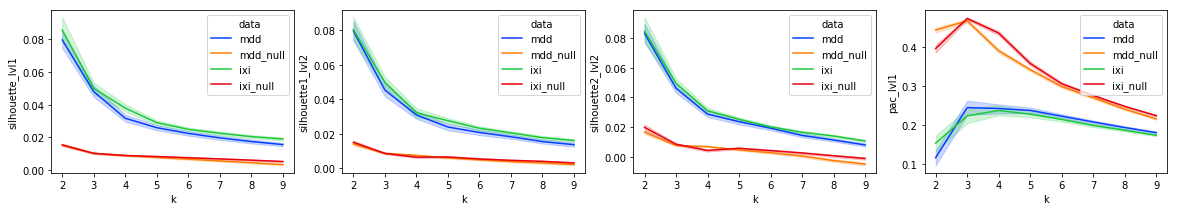

Sc


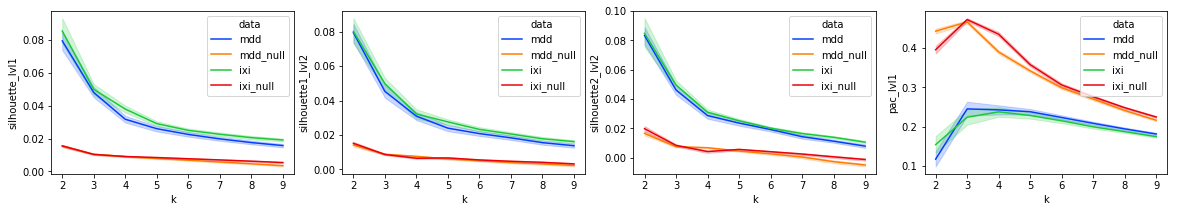

TSc


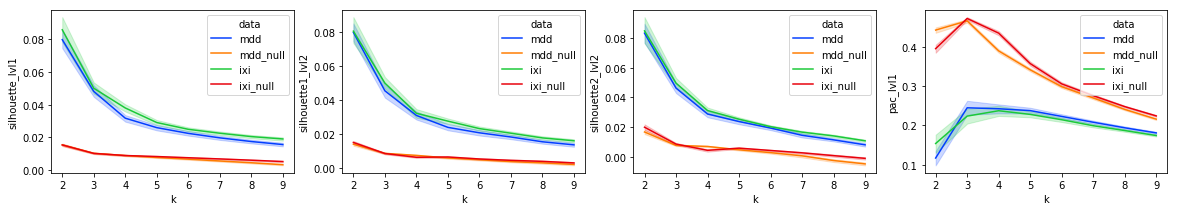

In [92]:
for s in range(3):
    print(sets[s])
    fig = plt.figure(figsize=[20,3])
    plt.subplot(1,4,1)
    sns.lineplot(y='silhouette_lvl1',x='k',hue='data',data=df, palette='bright')
    plt.subplot(1,4,2)
    sns.lineplot(y='silhouette1_lvl2',x='k',hue='data',data=df, palette='bright')
    plt.subplot(1,4,3)
    sns.lineplot(y='silhouette2_lvl2',x='k',hue='data',data=df, palette='bright')
    plt.subplot(1,4,4)
    sns.lineplot(y='pac_lvl1',x='k',hue='data',data=df, palette='bright')
    plt.show()

mdd


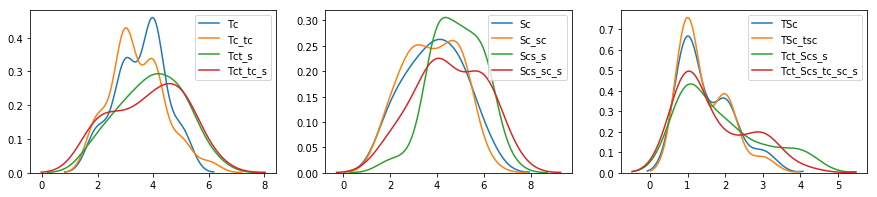

mdd_null


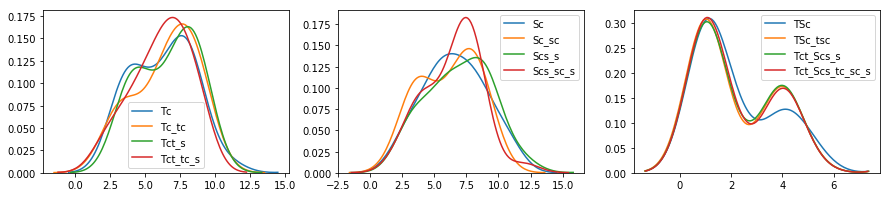

ixi


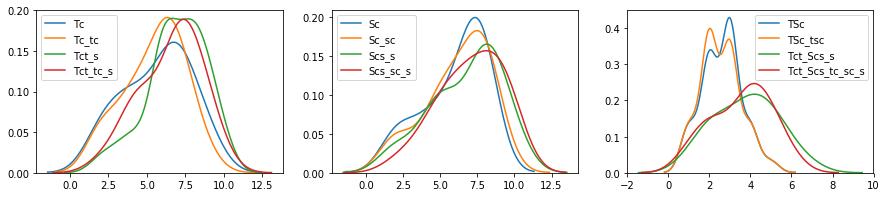

ixi_null


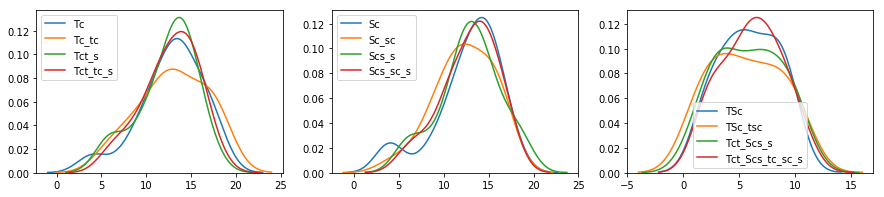

In [109]:
for d in ['mdd','mdd_null','ixi','ixi_null']:
    print(d)
    fig=plt.figure(figsize=[15,3])
    df2=df[df['data']==d]
    for mod in range(3):
        plt.subplot(1,3,mod+1)
        a=np.linspace(mod,9+mod,4).astype(int)
        for s in a:
            df3=df2[df2['set']==sets[s]]
            sns.kdeplot(df3['naglom'].to_numpy(), label=sets[s])
        #plt.xlim([0,10])
    plt.show()

In [ ]:
0/3

In [89]:
nclus_aglomin.shape

(12, 4, 4, 8)

clussize_lvl1


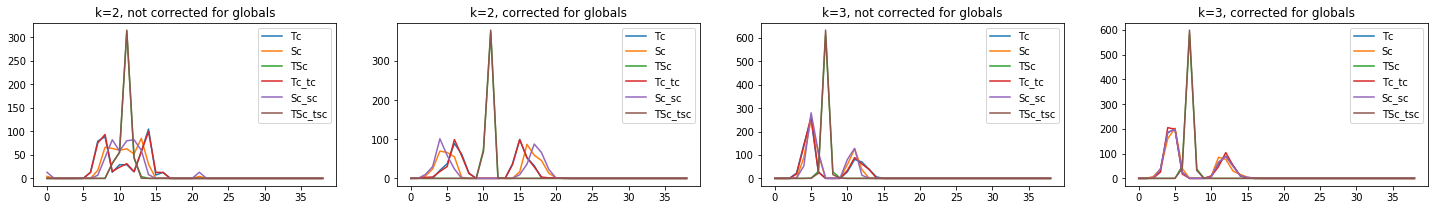

clussize_lvl1n


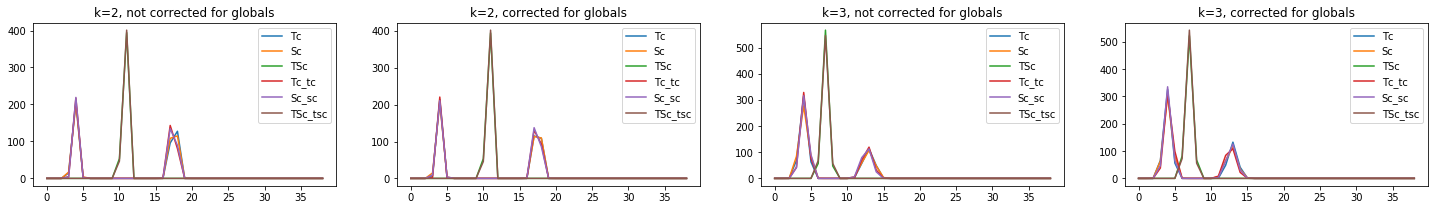

clussize_CE_lvl2


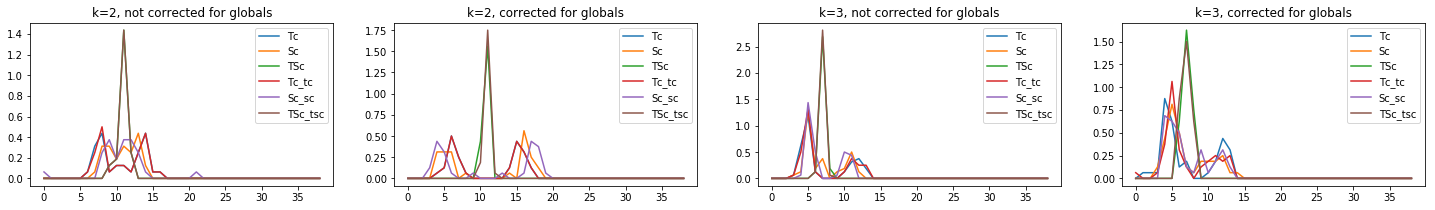

clussize_CE_lvl2n


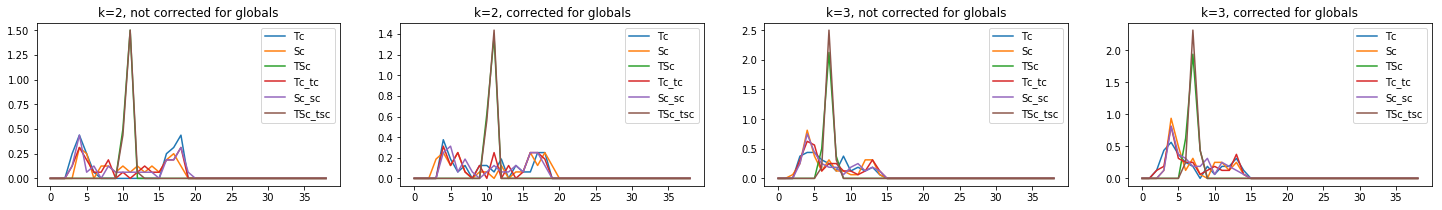

clussize_test_lvl2


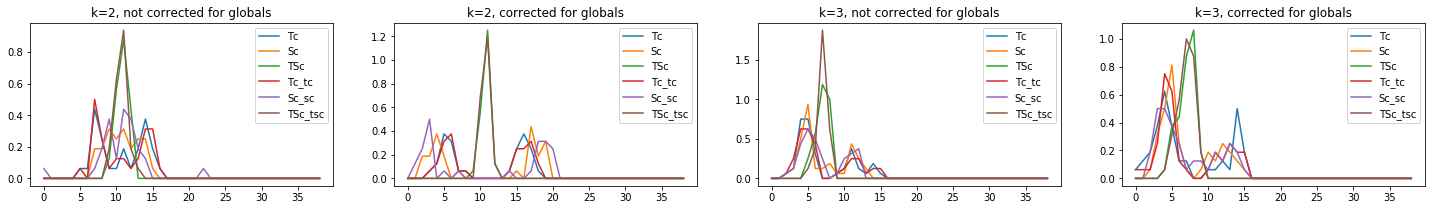

clussize_test_lvl2n


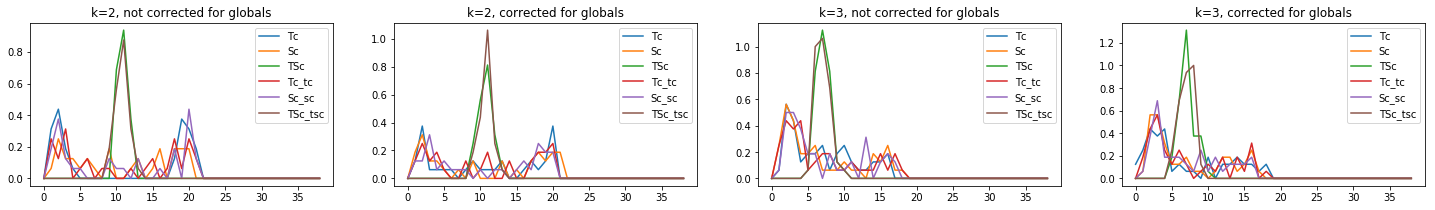

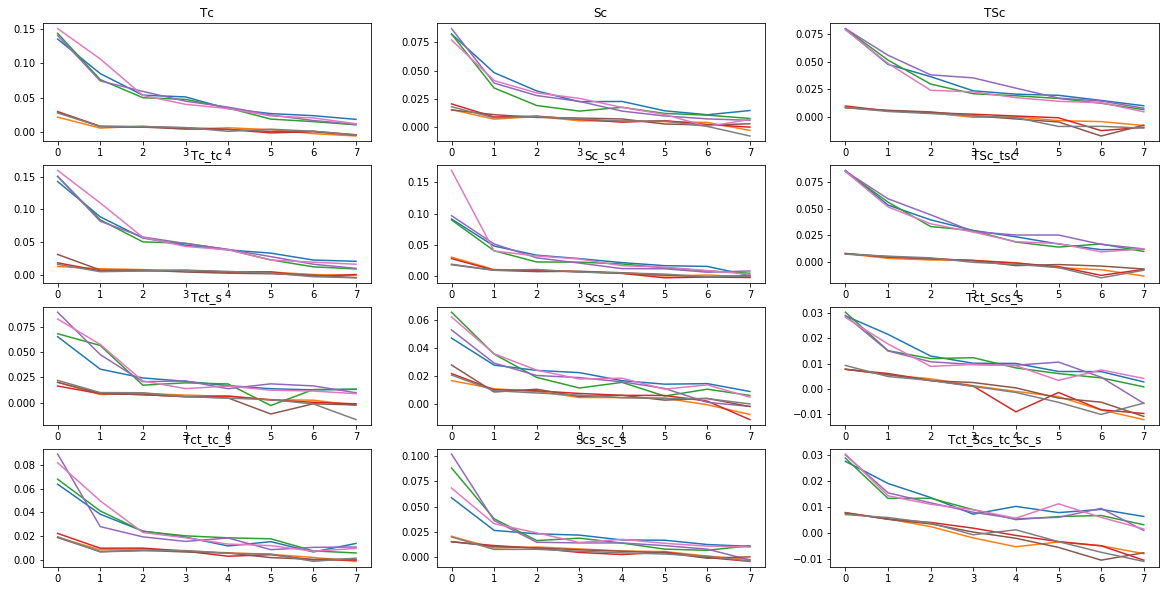

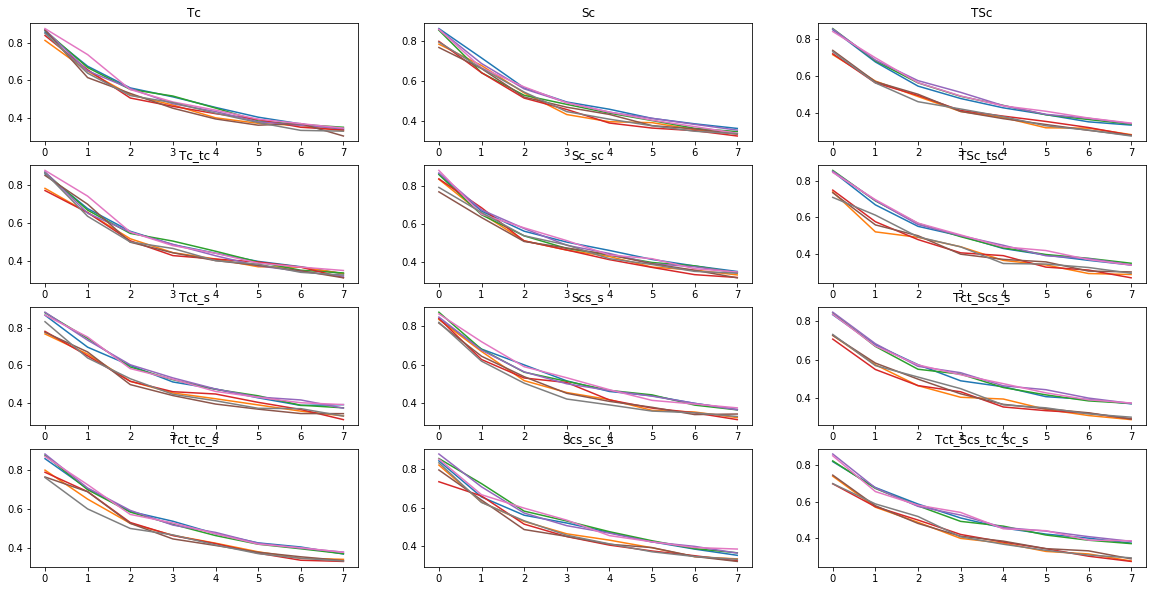

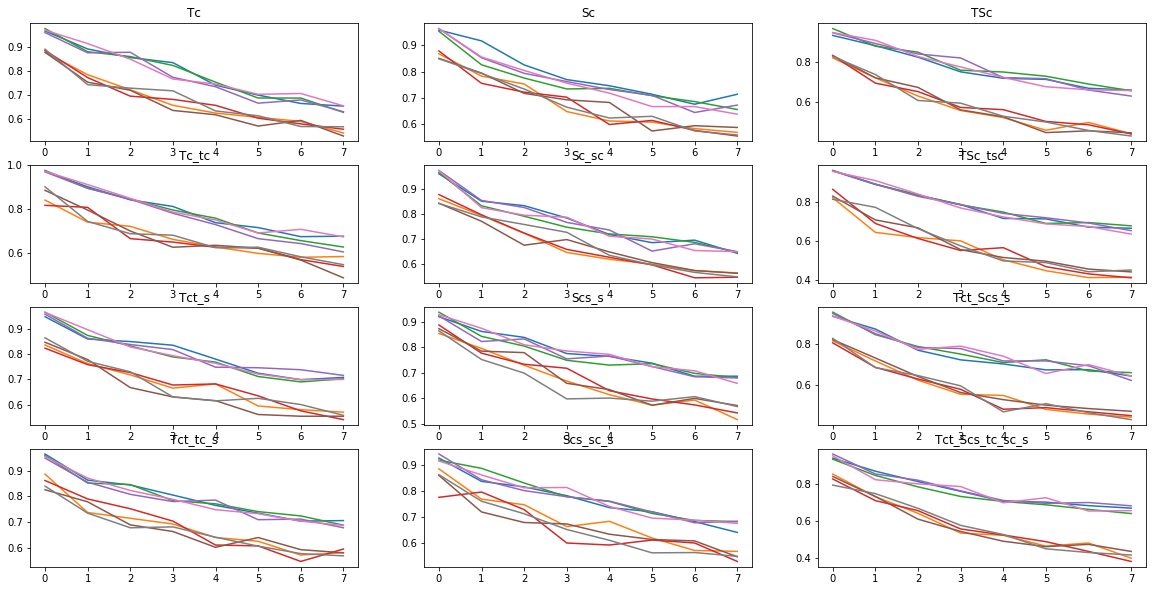

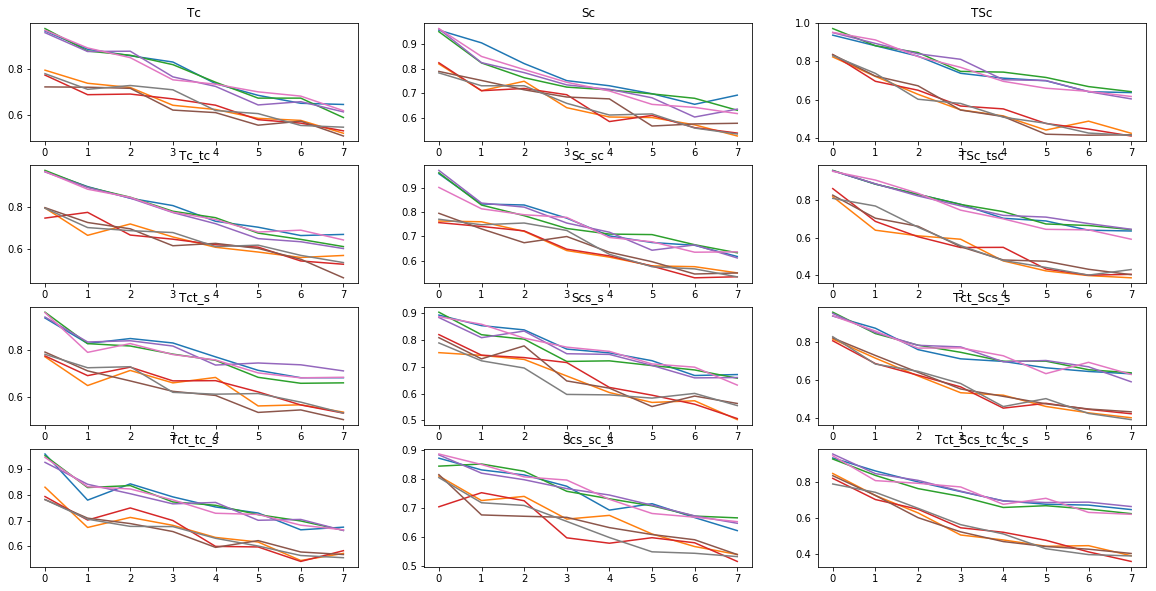

In [36]:
##################
#    LEVEL 2     #
##################

with open(input_filedir + modstr + 'sil_f1_prob_lvl2.pkl', 'rb') as f:
    [silhouette1_lvl2,silhouette2_lvl2,microf1_lvl2,macrof1_lvl2,testproba_lvl2,clussize_CE_lvl2,clussize_test_lvl2]=pickle.load(f)

with open(input_filedirn + modstrn + 'sil_f1_prob_lvl2.pkl', 'rb') as f:
    [silhouette1_lvl2n,silhouette2_lvl2n,microf1_lvl2n,macrof1_lvl2n,testproba_lvl2n,clussize_CE_lvl2n,clussize_test_lvl2n]=pickle.load(f)

with open(input_filediri + modstr + 'sil_f1_prob_lvl2.pkl', 'rb') as f:
    [silhouette1_lvl2i,silhouette2_lvl2i,microf1_lvl2i,macrof1_lvl2i,testproba_lvl2i,clussize_CE_lvl2i,clussize_test_lvl2i]=pickle.load(f)

with open(input_filedirin + modstrn + 'sil_f1_prob_lvl2.pkl', 'rb') as f:
    [silhouette1_lvl2in,silhouette2_lvl2in,microf1_lvl2in,macrof1_lvl2in,testproba_lvl2in,clussize_CE_lvl2in,clussize_test_lvl2in]=pickle.load(f)
    
def plot_clussize23(clussize_lvl1):
    fig=plt.figure(figsize=[25,3])
    for k in range(2):
        plt.subplot(1,4,(k*2+1))
        for s in range(6):
            plt.plot([np.nanmean(clussize_lvl1[s,:,:,k,i]) for i in range(clussize_lvl1.shape[4])])
        plt.legend(sets); plt.title(('k=' + str(k+2) + ', not corrected for globals'))
        plt.subplot(1,4,(k*2+2))
        for s in range(6):
            plt.plot([np.nanmean(clussize_lvl1[s+6,:,:,k,i]) for i in range(clussize_lvl1.shape[4])])
        plt.legend(sets); plt.title(('k=' + str(k+2) + ', corrected for globals'))
    plt.show()       
    
print('clussize_lvl1')    
plot_clussize23(clussize_lvl1)  
print('clussize_lvl1n') 
plot_clussize23(clussize_lvl1n)  
print('clussize_CE_lvl2')    
plot_clussize23(clussize_CE_lvl2)  
print('clussize_CE_lvl2n') 
plot_clussize23(clussize_CE_lvl2n)  
print('clussize_test_lvl2') 
plot_clussize23(clussize_test_lvl2)  
print('clussize_test_lvl2n') 
plot_clussize23(clussize_test_lvl2n)  


fig=plt.figure(figsize=[20,10])
for s in range(len(sets)):
    plt.subplot(4,3,s+1); plt.title(sets[s])
    for mf in range(4):
        plt.plot([np.nanmean(silhouette2_lvl2[s,mf,:,k]) for k in range(n_k)])
        plt.plot([np.nanmean(silhouette2_lvl2n[s,mf,:,k]) for k in range(n_k)])
plt.show()

fig=plt.figure(figsize=[20,10])
for s in range(len(sets)):
    plt.subplot(4,3,s+1); plt.title(sets[s])
    for mf in range(4):
        plt.plot([np.nanmean(testproba_lvl2[s,mf,:,k]) for k in range(n_k)])
        plt.plot([np.nanmean(testproba_lvl2n[s,mf,:,k]) for k in range(n_k)])
plt.show()

fig=plt.figure(figsize=[20,10])
for s in range(len(sets)):
    plt.subplot(4,3,s+1); plt.title(sets[s])
    for mf in range(4):
        plt.plot([np.nanmean(microf1_lvl2[s,mf,:,k]) for k in range(n_k)])
        plt.plot([np.nanmean(microf1_lvl2n[s,mf,:,k]) for k in range(n_k)])
plt.show()

fig=plt.figure(figsize=[20,10])
for s in range(len(sets)):
    plt.subplot(4,3,s+1); plt.title(sets[s])
    for mf in range(4):
        plt.plot([np.nanmean(macrof1_lvl2[s,mf,:,k]) for k in range(n_k)])
        plt.plot([np.nanmean(macrof1_lvl2n[s,mf,:,k]) for k in range(n_k)])
plt.show()